In [ ]:
#  https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/\
#  https://thinkingneuron.com/data-science-interview-questions-deep-learning/#What-Happens-inside-a-Neuron

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
from sklearn.model_selection import cross_val_score
from keras.callbacks import EarlyStopping

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NUAK2_Master_dataset.csv to NUAK2_Master_dataset.csv


In [ ]:
master_data= pd.read_csv('NUAK2_Master_dataset.csv')

master_data.head()

,Code,smiles,IC50 (nM),cLogP,cLogS,Shape Index,Molecular Flexibility,Molecular Complexity,r_lp_Energy,b_lp_Chiralities_Consistent,i_qp_#stars,i_qp_#amine,i_qp_#amidine,i_qp_#acid,i_qp_#amide,i_qp_#rotor,i_qp_#rtvFG,i_qp_CNS,r_qp_mol_MW,r_qp_dipole,r_qp_SASA,r_qp_FOSA,r_qp_FISA,r_qp_PISA,r_qp_WPSA,r_qp_volume,r_qp_donorHB,r_qp_accptHB,r_qp_dip^2/V,r_qp_ACxDN^.5/SA,r_qp_glob,r_qp_QPpolrz,r_qp_QPlogPC16,r_qp_QPlogPoct,r_qp_QPlogPw,r_qp_QPlogPo/w,r_qp_QPlogS,r_qp_CIQPlogS,r_qp_QPlogHERG,r_qp_QPPCaco,...,i_qp_#metab,r_qp_QPlogKhsa,i_qp_HumanOralAbsorption,r_qp_PercentHumanOralAbsorption,r_qp_SAfluorine,r_qp_SAamideO,r_qp_PSA,i_qp_#NandO,i_qp_RuleOfFive,i_qp_RuleOfThree,i_qp_#ringatoms,i_qp_#in34,i_qp_#in56,i_qp_#noncon,i_qp_#nonHatm,r_qp_Jm,SlogP,SMR,LabuteASA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeteroAtoms,NumHeavyAtoms,NumAtoms,NumRings,Mannhold LogP,Bond Polarizabilities,Bond Count,Eccentric Connectivity Index,Fragment Complexity,Petitjean Number,Vertex adjacency information magnitude,XLogP,Zagreb Index,SP3 Character
0,KHKI-01101,CS(C1(CC1)c2cc(-c3cc(C#N)c(OC4CCOCC4)cc3)nc(NC...,NaN,3.0265,-6.864,0.50000,0.41375,0.88345,47.624549,1,1.0,0.0,0.0,0.0,0.0,8.0,1.0,-2.0,504.603,5.207,799.686,413.807,148.485,237.394,0.000,1512.408,1.0,10.45,0.017928,0.013068,0.796816,51.503,15.246,24.508,14.261,3.603,-6.502,-7.164,-5.952,387.096,...,2.0,0.256,1.0,81.401,0.0,0.0,110.486,8.0,1.0,1.0,27.0,3.0,24.0,8.0,36.0,0.000354,4.21888,136.1765,210.782519,504.612,504.183126,8,1,8,1,8,9,36,64,5,3.44,44.877796,40,1022,3364.09,0.470588,6.321928,3.589,196,0.156250
1,KHKI-01102,CS(C1(CC1)c2cc(-c3cc(C#N)c(OC4CCOCC4)cc3)nc(OC...,NaN,3.2065,-6.339,0.51515,0.41783,0.87927,39.110929,1,0.0,0.0,0.0,0.0,0.0,9.0,1.0,-2.0,471.570,10.630,837.792,571.315,153.956,112.522,0.000,1497.077,0.0,9.95,0.075472,0.000000,0.755425,49.055,14.314,22.285,11.363,3.283,-6.418,-6.033,-6.026,343.510,...,2.0,-0.080,1.0,91.554,0.0,0.0,109.640,8.0,0.0,1.0,21.0,3.0,18.0,8.0,33.0,0.000144,3.78568,122.8108,194.383934,471.579,471.182792,8,0,9,0,8,9,33,62,4,3.11,47.227003,36,863,3169.09,0.500000,6.169925,3.498,176,0.209677
2,KHKI-01103,CCCCOc1nc(NC2CC2)c(C#N)c(-c3cc(C#N)c(OC4CCOCC4...,NaN,3.9822,-7.117,0.53125,0.39016,0.88922,34.343233,1,1.0,0.0,0.0,0.0,0.0,11.0,0.0,-2.0,433.509,7.404,812.206,541.504,153.034,117.668,0.000,1439.011,1.0,7.95,0.038090,0.009788,0.758941,45.496,13.992,20.840,10.384,4.025,-7.232,-6.396,-5.994,350.491,...,2.0,0.442,1.0,96.055,0.0,0.0,106.008,8.0,0.0,1.0,21.0,3.0,18.0,8.0,32.0,0.000034,4.19796,118.4147,187.700978,433.512,433.211390,8,1,9,1,8,8,32,59,4,3.22,39.884589,35,832,2852.08,0.500000,6.129283,4.382,164,0.203390
3,KHKI-01104,Nc1c(C#N)c(Nc2c(OC)cc(N3CCN(C)CC3)cc2)ncn1,NaN,1.1963,-3.712,0.56000,0.32909,0.81243,48.786368,1,1.0,1.0,0.0,0.0,0.0,5.0,0.0,-1.0,339.399,2.043,640.275,314.054,163.187,163.033,0.000,1117.098,3.0,8.25,0.003738,0.022318,0.813191,36.899,11.559,20.912,14.896,1.190,-4.026,-3.641,-6.058,70.032,...,4.0,-0.145,3.0,66.941,0.0,0.0,99.366,8.0,0.0,0.0,18.0,0.0,18.0,4.0,25.0,0.000094,1.43448,97.1461,146.392102,339.403,339.180758,8,3,4,2,8,8,25,46,3,2.45,32.133347,27,535,1704.08,0.461538,5.754888,1.190,128,0.130435
4,KHKI-01105,Nc1c(C#N)c(Nc2c(Cl)cc(Cl)c(OC)c2)ncn1,NaN,2.6299,-5.579,0.50000,0.25647,0.79105,26.662878,1,0.0,0.0,0.0,0.0,0.0,5.0,0.0,-1.0,310.142,5.137,521.065,88.019,153.863,151.089,128.094,879.542,3.0,5.25,0.030000,0.017451,0.852008,27.278,10.063,16.934,11.554,1.977,-4.626,-5.045,-4.647,344.204,...,2.0,-0.243,3.0,83.924,0.0,0.0,89.559,6.0,0.0,0.0,12.0,0.0,12.0,0.0,20.0,0.003328,2.98948,77.4561,124.660088,310.144,309.018415,6,3,3,2,6,8,20,29,2,1.90,15.894863,21,300,520.08,0.444444,5.392317,2.462,100,0.034483


In [ ]:
column=['Code','smiles']
master_data.drop(column,axis=1,inplace=True)
master_data.head()

,IC50 (nM),cLogP,cLogS,Shape Index,Molecular Flexibility,Molecular Complexity,r_lp_Energy,b_lp_Chiralities_Consistent,i_qp_#stars,i_qp_#amine,i_qp_#amidine,i_qp_#acid,i_qp_#amide,i_qp_#rotor,i_qp_#rtvFG,i_qp_CNS,r_qp_mol_MW,r_qp_dipole,r_qp_SASA,r_qp_FOSA,r_qp_FISA,r_qp_PISA,r_qp_WPSA,r_qp_volume,r_qp_donorHB,r_qp_accptHB,r_qp_dip^2/V,r_qp_ACxDN^.5/SA,r_qp_glob,r_qp_QPpolrz,r_qp_QPlogPC16,r_qp_QPlogPoct,r_qp_QPlogPw,r_qp_QPlogPo/w,r_qp_QPlogS,r_qp_CIQPlogS,r_qp_QPlogHERG,r_qp_QPPCaco,r_qp_QPlogBB,r_qp_QPPMDCK,...,i_qp_#metab,r_qp_QPlogKhsa,i_qp_HumanOralAbsorption,r_qp_PercentHumanOralAbsorption,r_qp_SAfluorine,r_qp_SAamideO,r_qp_PSA,i_qp_#NandO,i_qp_RuleOfFive,i_qp_RuleOfThree,i_qp_#ringatoms,i_qp_#in34,i_qp_#in56,i_qp_#noncon,i_qp_#nonHatm,r_qp_Jm,SlogP,SMR,LabuteASA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeteroAtoms,NumHeavyAtoms,NumAtoms,NumRings,Mannhold LogP,Bond Polarizabilities,Bond Count,Eccentric Connectivity Index,Fragment Complexity,Petitjean Number,Vertex adjacency information magnitude,XLogP,Zagreb Index,SP3 Character
0,NaN,3.0265,-6.864,0.50000,0.41375,0.88345,47.624549,1,1.0,0.0,0.0,0.0,0.0,8.0,1.0,-2.0,504.603,5.207,799.686,413.807,148.485,237.394,0.000,1512.408,1.0,10.45,0.017928,0.013068,0.796816,51.503,15.246,24.508,14.261,3.603,-6.502,-7.164,-5.952,387.096,-1.478,177.350,...,2.0,0.256,1.0,81.401,0.0,0.0,110.486,8.0,1.0,1.0,27.0,3.0,24.0,8.0,36.0,0.000354,4.21888,136.1765,210.782519,504.612,504.183126,8,1,8,1,8,9,36,64,5,3.44,44.877796,40,1022,3364.09,0.470588,6.321928,3.589,196,0.156250
1,NaN,3.2065,-6.339,0.51515,0.41783,0.87927,39.110929,1,0.0,0.0,0.0,0.0,0.0,9.0,1.0,-2.0,471.570,10.630,837.792,571.315,153.956,112.522,0.000,1497.077,0.0,9.95,0.075472,0.000000,0.755425,49.055,14.314,22.285,11.363,3.283,-6.418,-6.033,-6.026,343.510,-1.778,155.867,...,2.0,-0.080,1.0,91.554,0.0,0.0,109.640,8.0,0.0,1.0,21.0,3.0,18.0,8.0,33.0,0.000144,3.78568,122.8108,194.383934,471.579,471.182792,8,0,9,0,8,9,33,62,4,3.11,47.227003,36,863,3169.09,0.500000,6.169925,3.498,176,0.209677
2,NaN,3.9822,-7.117,0.53125,0.39016,0.88922,34.343233,1,1.0,0.0,0.0,0.0,0.0,11.0,0.0,-2.0,433.509,7.404,812.206,541.504,153.034,117.668,0.000,1439.011,1.0,7.95,0.038090,0.009788,0.758941,45.496,13.992,20.840,10.384,4.025,-7.232,-6.396,-5.994,350.491,-1.871,159.294,...,2.0,0.442,1.0,96.055,0.0,0.0,106.008,8.0,0.0,1.0,21.0,3.0,18.0,8.0,32.0,0.000034,4.19796,118.4147,187.700978,433.512,433.211390,8,1,9,1,8,8,32,59,4,3.22,39.884589,35,832,2852.08,0.500000,6.129283,4.382,164,0.203390
3,NaN,1.1963,-3.712,0.56000,0.32909,0.81243,48.786368,1,1.0,1.0,0.0,0.0,0.0,5.0,0.0,-1.0,339.399,2.043,640.275,314.054,163.187,163.033,0.000,1117.098,3.0,8.25,0.003738,0.022318,0.813191,36.899,11.559,20.912,14.896,1.190,-4.026,-3.641,-6.058,70.032,-0.985,30.912,...,4.0,-0.145,3.0,66.941,0.0,0.0,99.366,8.0,0.0,0.0,18.0,0.0,18.0,4.0,25.0,0.000094,1.43448,97.1461,146.392102,339.403,339.180758,8,3,4,2,8,8,25,46,3,2.45,32.133347,27,535,1704.08,0.461538,5.754888,1.190,128,0.130435
4,NaN,2.6299,-5.579,0.50000,0.25647,0.79105,26.662878,1,0.0,0.0,0.0,0.0,0.0,5.0,0.0,-1.0,310.142,5.137,521.065,88.019,153.863,151.089,128.094,879.542,3.0,5.25,0.030000,0.017451,0.852008,27.278,10.063,16.934,11.554,1.977,-4.626,-5.045,-4.647,344.204,-0.837,785.959,...,2.0,-0.243,3.0,83.924,0.0,0.0,89.559,6.0,0.0,0.0,12.0,0.0,12.0,0.0,20.0,0.003328,2.98948,77.4561,124.660088,310.144,309.018415,6,3,3,2,6,8,20,29,2,1.90,15.894863,21,300,520.08,0.444444,5.392317,2.462,100,0.034483


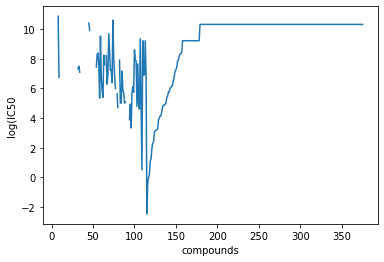

In [ ]:
plt.plot(np.log(master_data['IC50 (nM)']))
plt.xlabel('compounds')
plt.ylabel('log(IC50')
plt.show()

In [ ]:
master_data.dropna()
#np.isnan(df.any()) #and gets False
#np.any(np.isnan(df))
#cleaning the unwanted values from the data
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

data=clean_dataset(master_data)
data

,IC50 (nM),cLogP,cLogS,Shape Index,Molecular Flexibility,Molecular Complexity,r_lp_Energy,b_lp_Chiralities_Consistent,i_qp_#stars,i_qp_#amine,i_qp_#amidine,i_qp_#acid,i_qp_#amide,i_qp_#rotor,i_qp_#rtvFG,i_qp_CNS,r_qp_mol_MW,r_qp_dipole,r_qp_SASA,r_qp_FOSA,r_qp_FISA,r_qp_PISA,r_qp_WPSA,r_qp_volume,r_qp_donorHB,r_qp_accptHB,r_qp_dip^2/V,r_qp_ACxDN^.5/SA,r_qp_glob,r_qp_QPpolrz,r_qp_QPlogPC16,r_qp_QPlogPoct,r_qp_QPlogPw,r_qp_QPlogPo/w,r_qp_QPlogS,r_qp_CIQPlogS,r_qp_QPlogHERG,r_qp_QPPCaco,r_qp_QPlogBB,r_qp_QPPMDCK,...,i_qp_#metab,r_qp_QPlogKhsa,i_qp_HumanOralAbsorption,r_qp_PercentHumanOralAbsorption,r_qp_SAfluorine,r_qp_SAamideO,r_qp_PSA,i_qp_#NandO,i_qp_RuleOfFive,i_qp_RuleOfThree,i_qp_#ringatoms,i_qp_#in34,i_qp_#in56,i_qp_#noncon,i_qp_#nonHatm,r_qp_Jm,SlogP,SMR,LabuteASA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeteroAtoms,NumHeavyAtoms,NumAtoms,NumRings,Mannhold LogP,Bond Polarizabilities,Bond Count,Eccentric Connectivity Index,Fragment Complexity,Petitjean Number,Vertex adjacency information magnitude,XLogP,Zagreb Index,SP3 Character
8,52000.0,1.9156,-4.329,0.55556,0.34067,0.80291,47.747814,1.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,-1.0,385.486,4.217,679.054,356.647,157.823,120.645,43.939,1217.238,3.0,8.25,0.014612,0.021043,0.811916,39.859,12.491,22.211,14.459,1.942,-4.659,-4.496,-5.877,78.734,-0.888,61.067,...,2.0,0.048,3.0,72.254,0.000,0.000,95.133,8.0,0.0,0.0,18.0,0.0,18.0,4.0,27.0,2.734060e-05,2.15638,108.9271,162.880154,385.497,385.168479,8.0,3.0,5.0,2.0,9.0,9.0,27.0,50.0,3.0,2.45,36.599761,29.0,609.0,2002.09,0.500000,5.857981,2.021,138.0,0.140000
9,840.0,3.3521,-4.978,0.57576,0.38105,0.84822,64.455185,1.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,1.0,445.523,5.527,754.323,373.487,118.777,262.058,0.000,1392.360,2.0,9.00,0.021937,0.016873,0.799421,47.576,14.337,23.752,14.375,3.102,-5.324,-5.780,-6.753,184.688,-0.699,88.173,...,5.0,0.318,3.0,85.675,0.000,0.000,88.595,9.0,0.0,0.0,24.0,0.0,24.0,4.0,33.0,1.410450e-04,3.60448,129.0104,193.137655,445.527,445.222623,9.0,2.0,7.0,2.0,9.0,9.0,33.0,60.0,4.0,3.11,41.928589,36.0,964.0,2913.09,0.500000,6.169925,3.134,170.0,0.116667
27,40.0,4.0488,-5.343,0.54762,0.42019,0.89007,90.289674,1.0,2.0,2.0,0.0,0.0,0.0,6.0,0.0,1.0,581.642,8.721,956.993,520.972,109.077,240.723,86.221,1760.506,2.0,11.25,0.043203,0.016625,0.736797,62.748,17.451,30.737,17.119,4.241,-7.280,-6.650,-8.391,56.928,-0.129,81.112,...,6.0,0.816,1.0,70.239,86.221,0.000,90.654,10.0,1.0,1.0,30.0,0.0,30.0,8.0,42.0,1.792060e-08,4.36648,157.1704,242.859263,581.647,581.283841,10.0,2.0,7.0,2.0,10.0,13.0,42.0,76.0,5.0,3.22,55.234038,46.0,1504.0,4678.13,0.500000,6.523562,4.116,224.0,0.157895
32,1500.0,1.1497,-2.780,0.60606,0.35740,0.84594,71.285120,1.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,452.558,9.477,800.667,491.666,154.073,154.928,0.000,1459.365,2.0,11.95,0.061541,0.021107,0.777121,49.235,14.560,26.384,16.904,1.394,-3.861,-3.469,-7.330,21.312,-0.762,9.453,...,6.0,-0.093,2.0,58.887,0.000,0.000,100.017,10.0,0.0,1.0,24.0,0.0,24.0,8.0,33.0,3.375510e-06,0.96658,128.4725,194.549934,452.563,452.264822,10.0,2.0,7.0,2.0,10.0,10.0,33.0,65.0,4.0,2.89,48.778624,36.0,997.0,3568.10,0.473684,6.169925,1.270,170.0,0.184615
33,1800.0,2.0684,-4.206,0.57143,0.35289,0.83016,48.975241,1.0,1.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,379.464,5.835,727.372,473.367,123.641,130.364,0.000,1271.221,2.0,8.25,0.026782,0.016040,0.780230,42.113,12.373,21.217,12.929,2.452,-5.285,-4.225,-6.436,166.078,-0.754,78.611,...,4.0,0.173,3.0,81.045,0.000,0.000,88.088,8.0,0.0,0.0,21.0,3.0,18.0,7.0,28.0,2.941560e-05,2.42658,109.3784,164.691069,379.468,379.212058,8.0,2.0,6.0,2.0,8.0,8.0,28.0,53.0,4.0,2.78,37.826175,31.0,702.0,2380.08,0.466667,5.954196,2.196,148.0,0.169811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
data.shape

(321, 83)

In [ ]:
X=data.drop('IC50 (nM)',axis=1)
y=data['IC50 (nM)']
#print(y)
#y.describe()
#first_quartile=y.quantile(.25)
#third_quartile=y.quantile(.75)
#IQR=third_quartile - first_quartile
#new_boundry=third_quartile + 3*IQR
#y=y.drop(y[y>new_boundry].index,axis=0,inplace=False)
#print(y)
#y.describe()
#print(y.value_counts().count())
y=(np.log(y)).to_numpy()
y

array([10.858999  ,  6.73340189,  3.68887945,  7.31322039,  7.49554194,
        7.09007684, 10.42228135, 10.39818379,  9.89847501,  7.43248381,
        8.278936  ,  8.38708451,  7.58578882,  5.34710753,  9.52588077,
        6.70930434,  5.88610403,  5.39362755,  8.24275635,  7.60090246,
        8.2160881 ,  6.29156914,  7.00306546,  9.68657455,  8.51719319,
        7.24422752,  7.24422752,  6.39692966, 10.60410675,  8.00636757,
        6.90775528,  5.99146455,  5.6347896 ,  4.70048037,  7.90100705,
        5.01063529,  5.01063529,  7.17011954,  5.91350301,  5.70378247,
        5.01063529,  5.07517382,  3.8918203 ,  4.94164242,  3.33220451,
        5.70378247,  6.13122649,  5.7365723 ,  8.59600437,  7.88983375,
        7.86326672,  4.78749174,  7.64969262,  4.97673374,  4.60517019,
        9.34836167,  4.83628191,  0.51282363,  9.21034037,  6.90775528,
        6.90775528,  9.21034037,  6.90775528, -2.45340798, -0.35667494,
        0.        ,  0.18232156,  1.09861229,  1.25276297,  1.94

In [ ]:
y=y.reshape(-1,1)

len(X),len(y)

(321, 321)

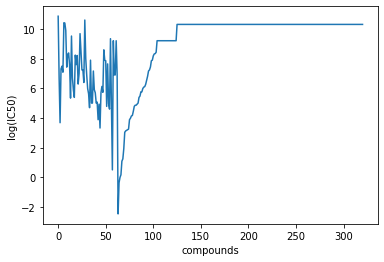

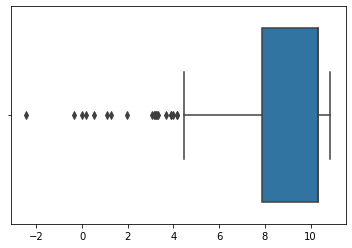

In [ ]:
#target variable distribution
plt.plot(y)
plt.xlabel('compounds')
plt.ylabel('log(IC50)')
plt.show()
sns.boxplot(y)

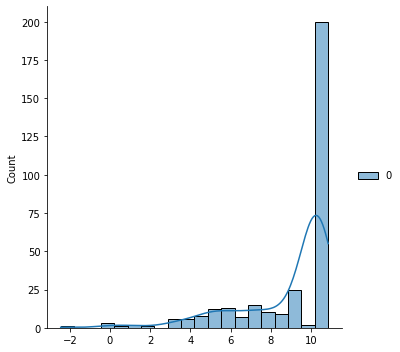

In [ ]:
sns.displot(y,bins=20,color="red", kde=True)
y.describe()

In [ ]:

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#X_train
#y_train

(224, 82)
(224, 1)
(97, 82)
(97, 1)


In [ ]:

# Installing required libraries
#!pip install tensorflow
#!pip install keras

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# create ANN model
ann_ntk = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
ann_ntk.add(Dense(units=80, input_dim=82, kernel_initializer='normal', activation='relu'))
#print(a)
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
ann_ntk.add(Dense(units=40, kernel_initializer='normal', activation='relu'))
#print(b)

#third hidden layer
ann_ntk.add(Dense(units=20, kernel_initializer='normal', activation='relu'))
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
ann_ntk.add(Dense(1, kernel_initializer='normal'))
#print(c)
ann_ntk.summary()
# Compiling the model
ann_ntk.compile(loss='mean_squared_error', optimizer='sgd',metrics=['mae'])
#print(d)

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
#earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fitting the ANN to the Training set
history=ann_ntk.fit(X_train, y_train ,batch_size = 30, epochs = 450, verbose='auto',validation_split = 0.3,shuffle = True)
                   # ,callbacks = [earlystopper])#,validation_split=0.3)# validation_data=(X_test, y_test))
#cross_val_score(history, X, y, cv=5)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                6640      
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 10,721
Trainable params: 10,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/450
6/6 [==============================] - 1s 41ms/step - loss: 0.8248 - mae: 0.7408 - val_loss: 0.9535 - val_mae: 0.7927
Epoch 2/450
6/6 [==============================] - 0s 

In [ ]:
# cross_val= KFold(n_splits=10, random_state=1, shuffle=True)
# print(cross_val)
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',cv=cross_val, n_jobs=-1)
# mean(absolute(scores))

In [ ]:

from sklearn.metrics import mean_squared_error
y_pred=ann_ntk.predict(X_test)
y_train_pred=ann_ntk.predict(X_train)
#score=model.evaluate(y_test,X_test,verbose='auto')
#print(score[0])
mse = mean_squared_error(y_test, y_pred)
#mae = mean_absolute_error(ytest,y_pred)
#print(mse)
print("MSE: %.2f" % mse)
#print("MAE:%.2f" % mae )
print("RMSE: %.2f" % (mse**(1/2.0)))
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: %.2f" % MAPE)
print('The Accuracy of ANN model is:', 100-MAPE)

MSE: 2.00
RMSE: 1.41
MAPE: 1.32
The Accuracy of ANN model is: 98.68312377568265


In [ ]:
from sklearn.metrics import r2_score
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred)))

The R2 score on the Train set is:	0.552
The R2 score on the Test set is:	-0.527


[0.8248302936553955, 0.8239932656288147, 0.8238899111747742, 0.8240782022476196, 0.8238288760185242, 0.823782205581665, 0.8235977292060852, 0.8230171203613281, 0.8235020041465759, 0.8231534957885742, 0.823691725730896, 0.8229781985282898, 0.8226502537727356, 0.8225292563438416, 0.8232281804084778, 0.8235360383987427, 0.8242335915565491, 0.8232305645942688, 0.8234033584594727, 0.8228233456611633, 0.8231359720230103, 0.8233767747879028, 0.8236348032951355, 0.8232933282852173, 0.8226819038391113, 0.8225619196891785, 0.8225627541542053, 0.8220459222793579, 0.8222012519836426, 0.8223046660423279, 0.8218837380409241, 0.8222581148147583, 0.8219788670539856, 0.8222602605819702, 0.8227422833442688, 0.8230695724487305, 0.8222835063934326, 0.8218475580215454, 0.8216823935508728, 0.8219395279884338, 0.8214238286018372, 0.8217663168907166, 0.8218677043914795, 0.821379542350769, 0.8214622735977173, 0.8218111991882324, 0.8214730620384216, 0.8209766745567322, 0.8211653232574463, 0.8215094208717346, 0.

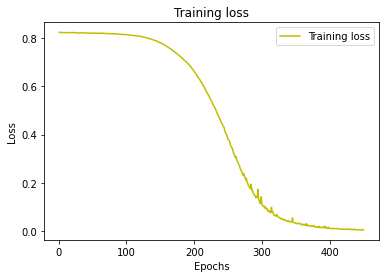

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
print(loss)

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[0.9535156488418579, 0.9535596370697021, 0.9534270167350769, 0.9534388184547424, 0.9533606171607971, 0.9536991119384766, 0.9542598724365234, 0.9540342688560486, 0.9546318054199219, 0.9546149969100952, 0.9546748995780945, 0.9548344612121582, 0.9547718167304993, 0.9550817012786865, 0.9558160305023193, 0.9561425447463989, 0.9564031958580017, 0.956464409828186, 0.9556729793548584, 0.9563407897949219, 0.9562596678733826, 0.9567732810974121, 0.9566437005996704, 0.9562664031982422, 0.955547571182251, 0.9549643397331238, 0.9540838599205017, 0.954033374786377, 0.9538364410400391, 0.9536716341972351, 0.952966034412384, 0.9528864622116089, 0.9529100060462952, 0.9522691369056702, 0.9521236419677734, 0.9523950219154358, 0.9524177312850952, 0.9523970484733582, 0.9529812932014465, 0.952896237373352, 0.9526723027229309, 0.9533010125160217, 0.9540046453475952, 0.9543628692626953, 0.9534839391708374, 0.953531801700592, 0.9537424445152283, 0.9536547660827637, 0.9540583491325378, 0.9535649418830872, 0.952

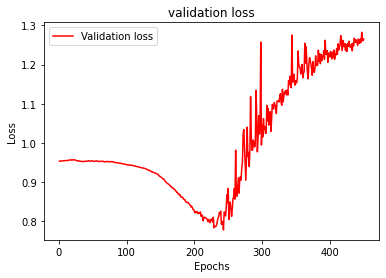

In [ ]:
val_loss = history.history['val_loss']
print(val_loss)
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# acc = history.history['mae']
# val_acc = history.history['val_mae']
# plt.plot(epochs, acc, 'y', label='Training MAE')
# plt.plot(epochs, val_acc, 'r', label='Validation MAE')
# plt.title('Training and validation MAE')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [ ]:
############################################
#Predict on test data
#predictions = ann_ntk.predict(X_test)
#print("Predicted values are: ", predictions)
#print("Real values are: ", y_test)
#MSE = mean_squared_error(y_test, Predictions)
#print("MSE: %.2f" % MSE)
#print("RMSE: %.2f" % (MSE**(1/2.0)))
##############################################

In [ ]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = ann_ntk.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 3ms/step - loss: 1.9986 - mae: 0.9293
Mean squared error from neural net:  1.9985891580581665
Mean absolute error from neural net:  0.9292712807655334


In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20,30,40]
    epoch_list  =   [5, 10, 50, 100,200,400]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            ann_ntk = Sequential()
            # Defining the first layer of the model
            ann_ntk.add(Dense(units=80, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            ann_ntk.add(Dense(units=40, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            ann_ntk.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            ann_ntk.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            ann_ntk.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-ann_ntk.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
#ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)


1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 58.27313682680855
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 56.815695200396796
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 80.28600588449189
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 61.727745873875314
5 Parameters: batch_size: 5 - epochs: 200 Accuracy: 66.97781760205729
6 Parameters: batch_size: 5 - epochs: 400 Accuracy: 67.46852686409068
7 Parameters: batch_size: 10 - epochs: 5 Accuracy: 52.8336713677526
8 Parameters: batch_size: 10 - epochs: 10 Accuracy: 66.80084634361795
9 Parameters: batch_size: 10 - epochs: 50 Accuracy: 71.8187639362852
10 Parameters: batch_size: 10 - epochs: 100 Accuracy: 65.60849820680144
11 Parameters: batch_size: 10 - epochs: 200 Accuracy: 56.76011638029394
12 Parameters: batch_size: 10 - epochs: 400 Accuracy: 69.75967478508556
13 Parameters: batch_size: 15 - epochs: 5 Accuracy: 50.72237826483885
14 Parameters: batch_size: 15 - epochs: 10 Accuracy: 62.78754106172072
15 Parameters: bat

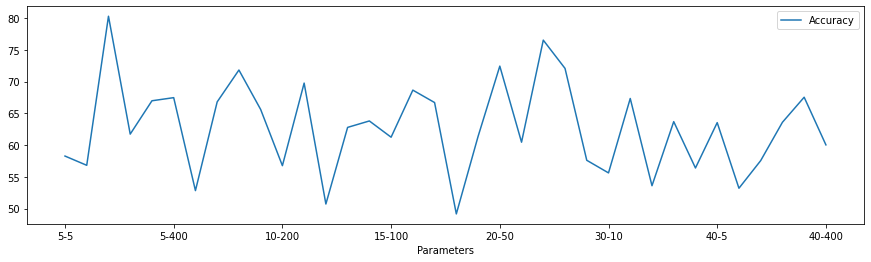

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
# # Fitting the ANN to the Training set
# ann_ntk.fit(X_train, y_train ,batch_size = 15, epochs = 1000, verbose=0)
 
# # Generating Predictions on testing data
# Predictions=model.predict(X_test)
 
# # Scaling the predicted Price data back to original price scale
# Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# # Scaling the y_test Price data back to original price scale
# y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# # Scaling the test data back to original scale
# Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
# TestingData=pd.DataFrame(data=Test_Data)#, columns=Predictors)
# #TestingData['Price']=y_test_orig
# #TestingData['PredictedPrice']=Predictions
# TestingData.head()

In [ ]:

# # Computing the absolute percent error
# APE=100*(abs(y_test_orig-Predictions)/y_test_orig)
# TestingData['APE']=APE

# print('The Accuracy of ANN model is:', 100-np.mean(APE))
# TestingData.head()
# 1
# 2
# 3
# 4
# 5
# 6
# # Computing the absolute percent error
# APE=100*(abs(y_test_orig-Predictions)/y_test_orig)
# TestingData['APE']=APE
 
# print('The Accuracy of ANN model is:', 100-np.mean(APE))
# TestingData.head()